In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from platform import python_version
python_version()

'3.6.7'

In [3]:
np.__version__

'1.18.1'

In [4]:
pd.__version__

'1.0.1'

## Built-in Collections

In [5]:
numbers = (1, 2, 3, 4, 5)  # Immutable, ordered
numbers

(1, 2, 3, 4, 5)

In [6]:
fruit_names = {'apple', 'banana', 'orange'}  # Unorded
fruit_names = fruit_names.union({'pomegranate', 'cherry'})  # Mutable
fruit_names = fruit_names.union({'apple'})  # No duplcates!
fruit_names

{'apple', 'banana', 'cherry', 'orange', 'pomegranate'}

In [7]:
data = [0.564, 0.670, 0.465]  # Mutable, ordered
data.append(0.876)
data.append(0.1023)
data

[0.564, 0.67, 0.465, 0.876, 0.1023]

In [8]:
stock = {'apple': 5, 'banana': 10, 'orange': 0}  # unordered
stock['pomegranate'] = 1  # Mutable
stock

{'apple': 5, 'banana': 10, 'orange': 0, 'pomegranate': 1}

In [9]:
stock.keys()

dict_keys(['apple', 'banana', 'orange', 'pomegranate'])

In [10]:
stock.values()

dict_values([5, 10, 0, 1])

In [11]:
things = ['apple', 100, numbers, 3.14159]  # Multifarious types allowed
things

['apple', 100, (1, 2, 3, 4, 5), 3.14159]

## Indexing

In [12]:
numbers[0]

1

In [13]:
numbers[1:]

(2, 3, 4, 5)

In [14]:
numbers[-1]

5

In [15]:
'potato' in fruit_names

False

In [16]:
stock['apple']

5

In [17]:
stock['apple'] = 15
stock

{'apple': 15, 'banana': 10, 'orange': 0, 'pomegranate': 1}

In [18]:
del stock['pomegranate']
stock

{'apple': 15, 'banana': 10, 'orange': 0}

In [19]:
stock['grapes'] = 3
stock

{'apple': 15, 'banana': 10, 'orange': 0, 'grapes': 3}

## Numpy Arrays

In [20]:
data_array = np.array(data)
data_array

array([0.564 , 0.67  , 0.465 , 0.876 , 0.1023])

In [21]:
data_array.shape

(5,)

In [22]:
data_array.dtype

dtype('float64')

In [23]:
b = np.array([1, 255, 0, 0], dtype='B')
b

array([  1, 255,   0,   0], dtype=uint8)

In [24]:
b = b + 1
b

array([2, 0, 1, 1], dtype=uint8)

In [25]:
data2 = np.array([[1, 2, 3], [4, 5, 6]])
data2.shape

(2, 3)

In [26]:
data2

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
np.sqrt(data2)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [28]:
def my_calc(x):
    return x**2 - x + 1

In [29]:
my_calc(data2)

array([[ 1,  3,  7],
       [13, 21, 31]])

## Pandas Series

In [30]:
stock

{'apple': 15, 'banana': 10, 'orange': 0, 'grapes': 3}

In [31]:
stock_series = pd.Series(stock, name='Stock level')
stock_series

apple     15
banana    10
orange     0
grapes     3
Name: Stock level, dtype: int64

In [32]:
stock_series['apple']

15

In [33]:
stock_series.index

Index(['apple', 'banana', 'orange', 'grapes'], dtype='object')

In [34]:
stock_series.values

array([15, 10,  0,  3])

In [35]:
stock_series.name

'Stock level'

In [36]:
stock_series['banana'] = stock_series['banana'] + 50

In [37]:
stock_series

apple     15
banana    60
orange     0
grapes     3
Name: Stock level, dtype: int64

In [38]:
stock_series['pomegranate'] = 3

In [39]:
stock_series

apple          15
banana         60
orange          0
grapes          3
pomegranate     3
Name: Stock level, dtype: int64

In [40]:
stock_series['grapes']

3

## Pandas DataFrame

In [41]:
stock_series

apple          15
banana         60
orange          0
grapes          3
pomegranate     3
Name: Stock level, dtype: int64

In [42]:
price_data = {
    'apple': 1.24,
    'banana': 1.67,
    'orange': 1.95,
    'grapes': 3.24
}
price_series = pd.Series(price_data, name='Price ($)')
price_series

apple     1.24
banana    1.67
orange    1.95
grapes    3.24
Name: Price ($), dtype: float64

In [43]:
df = pd.concat([stock_series, price_series], axis=1, sort=False)
df

,Stock level,Price ($)
apple,15,1.24
banana,60,1.67
orange,0,1.95
grapes,3,3.24
pomegranate,3,NaN


In [44]:
df['Stock level']

apple          15
banana         60
orange          0
grapes          3
pomegranate     3
Name: Stock level, dtype: int64

In [45]:
df.loc['grapes']

Stock level    3.00
Price ($)      3.24
Name: grapes, dtype: float64

In [46]:
df.index

Index(['apple', 'banana', 'orange', 'grapes', 'pomegranate'], dtype='object')

In [47]:
df.columns

Index(['Stock level', 'Price ($)'], dtype='object')

In [48]:
df.values

array([[15.  ,  1.24],
       [60.  ,  1.67],
       [ 0.  ,  1.95],
       [ 3.  ,  3.24],
       [ 3.  ,   nan]])

In [49]:
df.dtypes

Stock level      int64
Price ($)      float64
dtype: object

In [50]:
df

,Stock level,Price ($)
apple,15,1.24
banana,60,1.67
orange,0,1.95
grapes,3,3.24
pomegranate,3,NaN


In [51]:
df['Value in Stock'] = df['Stock level'] * df['Price ($)']
df

,Stock level,Price ($),Value in Stock
apple,15,1.24,18.60
banana,60,1.67,100.20
orange,0,1.95,0.00
grapes,3,3.24,9.72
pomegranate,3,NaN,NaN


In [52]:
items_on_sale = {
    'banana': True,
    'grapes': True,
    'coconut': True
}
promotions = pd.Series(items_on_sale, index=df.index).fillna(False)
promotions

apple          False
banana          True
orange         False
grapes          True
pomegranate    False
dtype: bool

In [53]:
df['Promotions'] = promotions
df

,Stock level,Price ($),Value in Stock,Promotions
apple,15,1.24,18.60,False
banana,60,1.67,100.20,True
orange,0,1.95,0.00,False
grapes,3,3.24,9.72,True
pomegranate,3,NaN,NaN,False


In [54]:
df.dropna()

,Stock level,Price ($),Value in Stock,Promotions
apple,15,1.24,18.60,False
banana,60,1.67,100.20,True
orange,0,1.95,0.00,False
grapes,3,3.24,9.72,True


In [55]:
df.describe()

,Stock level,Price ($),Value in Stock
count,5.000000,4.000000,4.000000
mean,16.200000,2.025000,32.130000
std,25.153529,0.861027,46.011342
min,0.000000,1.240000,0.000000
25%,3.000000,1.562500,7.290000
50%,3.000000,1.810000,14.160000
75%,15.000000,2.272500,39.000000
max,60.000000,3.240000,100.200000


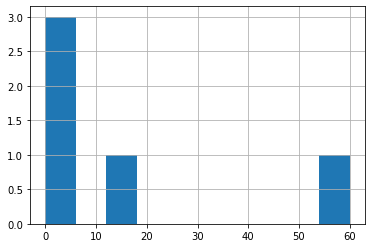

In [56]:
df['Stock level'].hist()
plt.show()

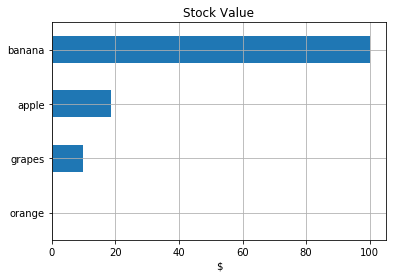

In [57]:
df['Value in Stock'].dropna().sort_values().plot.barh(title='Stock Value')
plt.xlabel('$')
plt.grid()
plt.show()

In [58]:
df

,Stock level,Price ($),Value in Stock,Promotions
apple,15,1.24,18.60,False
banana,60,1.67,100.20,True
orange,0,1.95,0.00,False
grapes,3,3.24,9.72,True
pomegranate,3,NaN,NaN,False


In [59]:
df.loc[df['Promotions'], 'Stock level']

banana    60
grapes     3
Name: Stock level, dtype: int64

In [60]:
df.loc[df['Stock level'] < 10]['Value in Stock'].sum()

9.72

## Saving

In [61]:
df.to_csv('stock_data.csv')

## Example with Real Data

In [137]:
import os

In [139]:
filename = 'DCS grinding historical Rst data April 4th 2012.xlsx'
filepath = os.path.join('data', filename)
df = pd.read_excel(filepath, header=None)

# Need to deal with first 3 header rows
#df.loc[0:2]

# Save info for later
info = df.loc[0:2].transpose().drop(0)
info.columns = ['Name', 'Units', 'Tag']
info = info.set_index('Name')
info.head()

,Units,Tag
Name,,
Prim Crusher Power,kW,310-JI-20211
Fresh Feed,MTPH,315-WQI-20327
Total SAG Feed,MTPH,315-WQI-20325
SAG Feed Density,%Sol,320-FX-20731A
Fresh Water Flowrate,m3/hr,360-FI-23704


In [140]:
# Trim rows and set columns and index
df.loc[0, 0] = 'Timestamp'
df.columns = df.loc[0]
df.columns.name = None
df = df.loc[3:]
df = df.set_index('Timestamp')
df.head()

,Prim Crusher Power,Fresh Feed,Total SAG Feed,SAG Feed Density,Fresh Water Flowrate,Reclaim Water Flowrate,Discharge Right,SAG Sound 1,SAG Sound 2,SAG Power,...,BM1 CYC Feed Flowrate,BM2 CYC Feed Flowrate,BM1 Speed,BM2 Speed,BM1 CYC Feed Water,BM2 CYC Feed Water,BM1 CYC Feed Density,BM2 CYC Feed Density,BM1 CYC Press.,BM2 CYC Press.
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-04-04 05:30:00,70.2831,1264.64,1586.36,63.0536,1068.44,1805.33,6831.73,111.918,111.413,13116,...,3982.06,4350.93,12.09,12.11,214.465,217.51,47.3381,43.5599,43.4479,48.8423
2012-04-04 05:31:00,60.5936,1234.74,1669.76,62.6013,1061.42,1802.52,6825,112.494,112.096,12903,...,4113.21,4311.93,12.1,12.11,216.571,209.407,47.4083,43.679,41.7285,48.4962
2012-04-04 05:32:00,0,1268.25,1596.89,62.1362,1068.44,1796.9,6865.4,113.106,110.515,12873,...,4050.19,4562.5,12.1,12.1,212.863,215.93,46.9444,45.069,42.851,43.827
2012-04-04 05:33:00,0,1282.12,1646.42,64.2787,1066.68,1805.33,6816.16,113.012,111.894,13073,...,4040.79,4499.12,12.11,12.09,214.465,215.404,46.2989,43.2792,45.9766,48.8844
2012-04-04 05:34:00,0,1311.01,1712.75,62.7837,1064.93,1795.19,6849.83,113.492,112.096,12858,...,4084.91,4366.29,12.12,12.11,213.939,210.987,47.6539,45.42,42.8089,49.9117


In [93]:
df.shape

(2880, 28)

In [100]:
for col in df:
    df[col] = pd.to_numeric(df[col])
df.dtypes

Prim Crusher Power        float64
Fresh Feed                float64
Total SAG Feed            float64
SAG Feed Density          float64
Fresh Water Flowrate      float64
Reclaim Water Flowrate    float64
Discharge Right           float64
SAG Sound 1               float64
SAG Sound 2               float64
SAG Power                   int64
SAG Speed                 float64
SAG Lube Temp             float64
Pebble Return Load        float64
Pebble Crusher Power      float64
Pebble Crusher CCS        float64
CV6                       float64
BM1 Power                   int64
BM2 Power                   int64
BM1 CYC Feed Flowrate     float64
BM2 CYC Feed Flowrate     float64
BM1 Speed                 float64
BM2 Speed                 float64
BM1 CYC Feed Water        float64
BM2 CYC Feed Water        float64
BM1 CYC Feed Density      float64
BM2 CYC Feed Density      float64
BM1 CYC Press.            float64
BM2 CYC Press.            float64
dtype: object

In [101]:
df.isna().sum()

Prim Crusher Power        0
Fresh Feed                0
Total SAG Feed            0
SAG Feed Density          0
Fresh Water Flowrate      0
Reclaim Water Flowrate    0
Discharge Right           0
SAG Sound 1               0
SAG Sound 2               0
SAG Power                 0
SAG Speed                 0
SAG Lube Temp             0
Pebble Return Load        0
Pebble Crusher Power      0
Pebble Crusher CCS        0
CV6                       0
BM1 Power                 0
BM2 Power                 0
BM1 CYC Feed Flowrate     0
BM2 CYC Feed Flowrate     0
BM1 Speed                 0
BM2 Speed                 0
BM1 CYC Feed Water        0
BM2 CYC Feed Water        0
BM1 CYC Feed Density      0
BM2 CYC Feed Density      0
BM1 CYC Press.            0
BM2 CYC Press.            0
dtype: int64

In [106]:
df.describe().transpose()[['count', 'min', 'max']]

,count,min,max
Prim Crusher Power,2880.0,0.000000,1000.00000
Fresh Feed,2880.0,1.464866,1514.71700
Total SAG Feed,2880.0,0.595102,2256.48900
SAG Feed Density,2880.0,0.274515,119.26610
Fresh Water Flowrate,2880.0,8.010986,1098.95500
Reclaim Water Flowrate,2880.0,0.000000,2752.78900
Discharge Right,2880.0,6302.750000,7690.64200
SAG Sound 1,2880.0,103.677300,117.12610
SAG Sound 2,2880.0,101.673600,116.27330
SAG Power,2880.0,-36.000000,13285.00000


In [161]:
df.index[0], df.index[-1]

(Timestamp('2012-04-04 05:30:00'), Timestamp('2012-04-06 05:29:00'))

## Analysing data visually

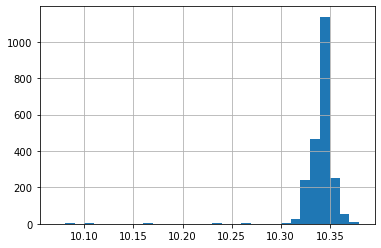

In [120]:
speeds_gt_10 = df['SAG Speed'] > 10
df.loc[speeds_gt_10, 'SAG Speed'].hist(bins=31)
plt.show()

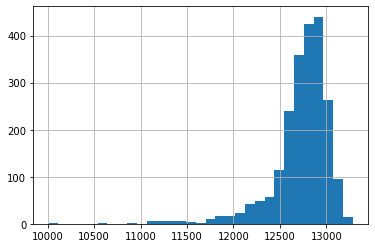

In [122]:
df.loc[speeds_gt_10, 'SAG Power'].hist(bins=31)
plt.show()

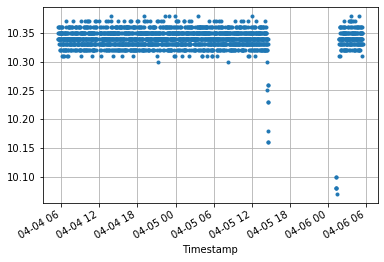

In [178]:
df.loc[speeds_gt_10, 'SAG Speed'].plot(style='.')
plt.grid()
plt.show()

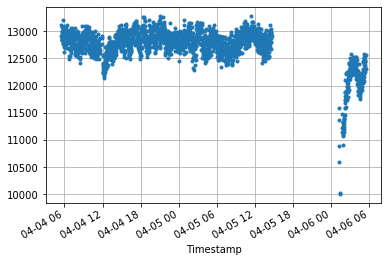

In [179]:
df.loc[speeds_gt_10, 'SAG Power'].plot(style='.')
plt.grid()
plt.show()

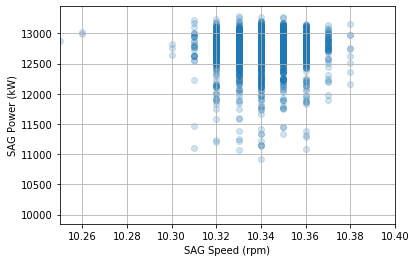

In [180]:
x = df.loc[speeds_gt_10, 'SAG Speed']
y = df.loc[speeds_gt_10, 'SAG Power']
plt.scatter(x, y, alpha=0.2)
plt.xlim(10.25, 10.4)
plt.xlabel(f"{x.name} ({info.loc[x.name, 'Units']})")
plt.ylabel(f"{y.name} ({info.loc[y.name, 'Units']})")
plt.grid()
plt.show()

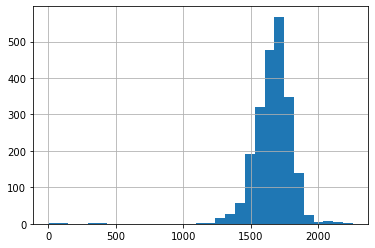

In [181]:
df.loc[speeds_gt_10, 'Total SAG Feed'].hist(bins=31)
plt.show()

## Example 2

In [194]:
filename = 'DCS Data Example.xlsx'
filepath = os.path.join('data', filename)
df = pd.read_excel(filepath, header=None)

# Need to deal with first 2 header rows
df.loc[0:1]

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,NaT,SAG rpm,Feed Bearing kPa,Dis Bearing kPa,SAG wtph,Pebble CSS,Recirc.,Pebble Reject Totalizer,Screen Deck amp,FD1 D80 inch,...,BM1 Cyc Feed Flow Rate,BM2 Pump Box Water flow,BM2 Pump Box Level,BM2 Power kW,BM2 SPEED,BM2 Feed Water Flow,BM2 Cyclone kPa,BM2 CYC. FEED DENSITY,BM2 Cyc Feed Flow Rate,OSA FF %Solid
1,NaT,SM-PEC-Mill-nAct,320-PIT-20941,320-PIT-20947,315-WQI-20327,325-HY-Gap,320-WQI-20846,325-WQI-20319,320-II-20755,315-EXP-FDR1-P80,...,320-FI-21136,320-FI-21230,320-LI-21231,BM2-PEC-Mill-P,BM2-PEC-Mill-nAct,320-FI-21285,320-PI-21238,320-DI-21237,320-FI-21236,300-OA-0186-BM1Sol


In [195]:
# Save info for later
info = df.loc[0:1].transpose().drop(0)
info.columns = ['Name', 'Tag']
info = info.set_index('Name')
info.head()

,Tag
Name,
SAG rpm,SM-PEC-Mill-nAct
Feed Bearing kPa,320-PIT-20941
Dis Bearing kPa,320-PIT-20947
SAG wtph,315-WQI-20327
Pebble CSS,325-HY-Gap


In [196]:
# Trim rows and set columns and index
df.loc[0, 0] = 'Timestamp'
df.columns = df.loc[0]
df.columns.name = None
df = df.loc[2:]
df = df.set_index('Timestamp')
df.head()

,SAG rpm,Feed Bearing kPa,Dis Bearing kPa,SAG wtph,Pebble CSS,Recirc.,Pebble Reject Totalizer,Screen Deck amp,FD1 D80 inch,FD2 D80 inch,...,BM1 Cyc Feed Flow Rate,BM2 Pump Box Water flow,BM2 Pump Box Level,BM2 Power kW,BM2 SPEED,BM2 Feed Water Flow,BM2 Cyclone kPa,BM2 CYC. FEED DENSITY,BM2 Cyc Feed Flow Rate,OSA FF %Solid
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-06 05:30:00,10.4816,6952.17,6261.19,1780.89,16.136,292.654,0.863263,31.862,1.58594,1.40429,...,5055.65,60.7807,44.323,12605.7,12.3346,0.358288,39.9423,71.9821,5173.3,44.8878
2017-01-06 05:31:00,10.4835,6953.01,6258.83,1791.12,16.136,294.881,0.863919,31.9225,1.58368,1.41579,...,5046.12,61.3404,45.0006,12618.8,12.3348,0.354895,40.1479,71.8553,5150.27,44.8878
2017-01-06 05:32:00,10.4831,6955.81,6253.46,1800.24,16.136,293.065,0.899928,31.9358,1.55908,1.43375,...,5070.73,64.2192,44.8348,12603.4,12.3388,0.349461,39.9234,72.0669,5218.75,44.8878
2017-01-06 05:33:00,10.4821,6956.2,6256.94,1788.26,16.136,291.898,0.886091,32.0162,1.55133,1.44379,...,5038.52,68.3223,44.4711,12603,12.3378,0.346761,40.1441,71.9733,5176.32,44.8878
2017-01-06 05:34:00,10.4829,6943.73,6261.08,1792.45,16.136,294.364,0.926062,32.2032,1.53359,1.42751,...,5081.67,65.128,45.1929,12604.2,12.3391,0.346761,40.0629,72.1788,5193.33,44.8878


In [200]:
df.shape

(1440, 37)

In [201]:
for col in df:
    df[col] = pd.to_numeric(df[col])
df.dtypes

SAG rpm                    float64
Feed Bearing kPa           float64
Dis Bearing kPa            float64
SAG wtph                   float64
Pebble CSS                 float64
Recirc.                    float64
Pebble Reject Totalizer    float64
Screen Deck amp            float64
FD1 D80 inch               float64
FD2 D80 inch               float64
FD3 D80 inch               float64
FD1 Speed%                 float64
FD2 Speed%                 float64
FD3 Speed%                 float64
SAG kW                     float64
Pebble kW                  float64
SAG Water                  float64
Dis Water                  float64
Push Water                 float64
Transfer %Solid            float64
BM1 Pump Box Water flow    float64
BM1 Pump Box Level         float64
BM1 Power kW               float64
BM1 SPEED                  float64
BM1 Feed Water Flow        float64
BM1 Cyclone kPa            float64
BM1 CYC. FEED DENSITY      float64
BM1 Cyc Feed Flow Rate     float64
BM2 Pump Box Water f

In [202]:
df.describe()

,SAG rpm,Feed Bearing kPa,Dis Bearing kPa,SAG wtph,Pebble CSS,Recirc.,Pebble Reject Totalizer,Screen Deck amp,FD1 D80 inch,FD2 D80 inch,...,BM1 Cyc Feed Flow Rate,BM2 Pump Box Water flow,BM2 Pump Box Level,BM2 Power kW,BM2 SPEED,BM2 Feed Water Flow,BM2 Cyclone kPa,BM2 CYC. FEED DENSITY,BM2 Cyc Feed Flow Rate,OSA FF %Solid
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.00000,1440.000000
mean,10.481519,6976.487751,6272.578553,1807.925945,15.958596,306.743716,0.995889,32.225269,1.560141,1.419372,...,5060.368817,54.763743,46.184280,12590.485243,12.335337,0.350923,39.999418,71.910470,5155.29411,45.221231
std,0.003083,22.971586,23.366039,44.962537,2.217289,23.043017,0.215196,0.503777,0.103332,0.038855,...,38.989584,45.384543,3.478773,60.242943,0.002996,0.003967,0.168657,0.794754,45.63280,1.517136
min,10.472630,6913.743000,6206.637000,1697.510000,12.944010,256.555500,0.759294,31.132540,1.373525,1.306794,...,4952.278000,0.088800,40.634440,12435.150000,12.323600,0.346761,39.396870,69.960480,5029.53000,41.071870
25%,10.479378,6962.583250,6257.459250,1780.932500,14.120010,290.711275,0.870844,31.880225,1.487003,1.394648,...,5032.513250,0.199455,44.590863,12554.907500,12.333410,0.346761,39.890313,71.381438,5123.79375,44.561560
50%,10.481475,6975.705500,6270.785000,1818.695500,15.128020,303.787350,0.908780,32.158715,1.538914,1.421941,...,5061.472000,57.229145,45.161420,12601.250000,12.335420,0.350667,39.995480,71.942695,5156.97950,45.385360
75%,10.483660,6992.094250,6288.244000,1843.820000,18.992000,320.190725,1.025239,32.495405,1.621079,1.446005,...,5087.724500,90.681482,45.903370,12636.650000,12.337272,0.353279,40.105150,72.503750,5188.02500,46.136358
max,10.492360,7037.431000,6335.180000,1885.738000,19.374250,383.882700,2.005210,34.203490,2.001935,1.519087,...,5178.790000,168.368400,61.740430,12704.200000,12.346020,0.373074,40.567880,73.985370,5306.72300,48.339210


In [204]:
df.isna().sum()

SAG rpm                       0
Feed Bearing kPa              0
Dis Bearing kPa               0
SAG wtph                      0
Pebble CSS                    0
Recirc.                       0
Pebble Reject Totalizer       0
Screen Deck amp               0
FD1 D80 inch                  0
FD2 D80 inch                  0
FD3 D80 inch                  0
FD1 Speed%                    0
FD2 Speed%                    0
FD3 Speed%                    0
SAG kW                        0
Pebble kW                     0
SAG Water                     0
Dis Water                     0
Push Water                    0
Transfer %Solid            1439
BM1 Pump Box Water flow       0
BM1 Pump Box Level            0
BM1 Power kW                  0
BM1 SPEED                     0
BM1 Feed Water Flow           0
BM1 Cyclone kPa               0
BM1 CYC. FEED DENSITY         0
BM1 Cyc Feed Flow Rate        0
BM2 Pump Box Water flow       0
BM2 Pump Box Level            0
BM2 Power kW                  0
BM2 SPEE

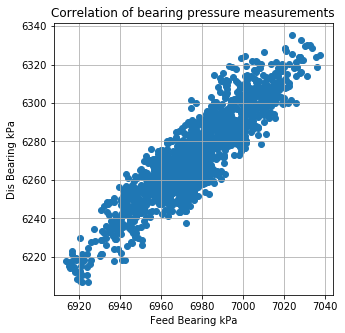

In [212]:
x = df['Feed Bearing kPa']
y = df['Dis Bearing kPa']
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('Correlation of bearing pressure measurements')
plt.grid()
plt.show()

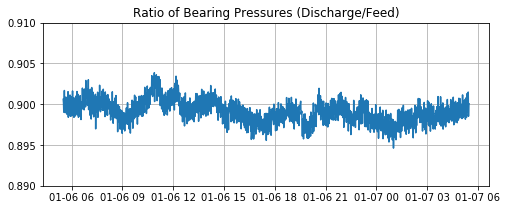

In [230]:
plt.figure(figsize=(8,3))
plt.plot(y/x)
plt.title('Ratio of Bearing Pressures (Discharge/Feed)')
plt.ylim(0.89, 0.91)
plt.grid()
plt.show()

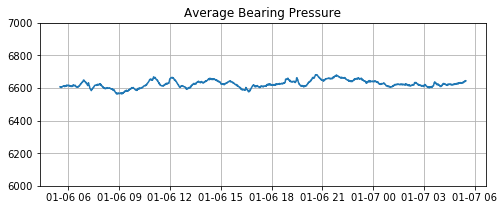

In [226]:
plt.figure(figsize=(8,3))
plt.plot((x+y)/2)
plt.title('Average Bearing Pressure')
plt.ylim(6000,7000)
plt.grid()
plt.show()

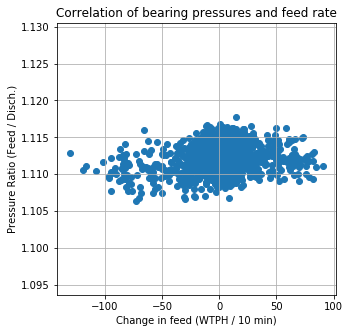

In [247]:
x = df['SAG wtph'].diff(10).rename('Change in feed (WTPH / 10 min)')
y = (df['Feed Bearing kPa'] / df['Dis Bearing kPa'])
y = y.rename('Pressure Ratio (Feed / Disch.)')
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('Correlation of bearing pressures and feed rate')
plt.grid()
plt.show()

In [320]:
from sklearn.linear_model import LinearRegression

delay = 3

data_to_fit = pd.DataFrame({
    f'Change in feed (WTPH) over {delay} min': df['SAG wtph'].diff(delay),
    'Pressure Ratio (Feed / Disch.)': (df['Feed Bearing kPa'] / df['Dis Bearing kPa'])
})

data_to_fit = data_to_fit.dropna()
x = data_to_fit[f'Change in feed (WTPH) over {delay} min'].values.reshape(-1,1)
y = data_to_fit['Pressure Ratio (Feed / Disch.)'].values.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

print(f"R-squared: {model.score(x, y)}")
print(f"Coef., intercept: ({model.coef_.item()}, {model.intercept_[0]})")

R-squared: 0.03451273536537047
Coef., intercept: (2.6717235992935034e-05, 1.1122219157779847)


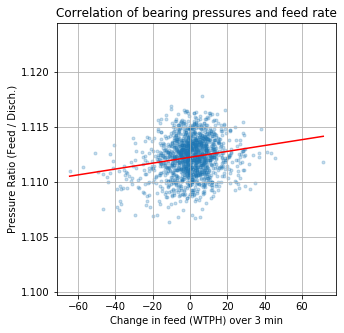

In [322]:
x = data_to_fit[f'Change in feed (WTPH) over {delay} min']
y = data_to_fit['Pressure Ratio (Feed / Disch.)']

x_line = np.linspace(x.min(), x.max(), 100)
best_fit_line = pd.Series(
    data=model.predict(x_line.reshape(-1,1)).reshape(-1,), 
    index=x_line,
    name='Best Fit'
)

plt.figure(figsize=(5, 5))
plt.scatter(x, y, marker='.', alpha=0.25)
best_fit_line.plot(style='r-') 
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title('Correlation of bearing pressures and feed rate')
plt.grid()
plt.show()